# TITANIC

In [1]:
#Imports
import pandas as pd
import numpy as np

#Imports for Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the Titanic Data

In [2]:
titanic_data = pd.read_csv('train.csv')

#### Head, info , describe

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualisations and Interpretations of the Data

In [6]:
#check for incorrect data/ null data
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


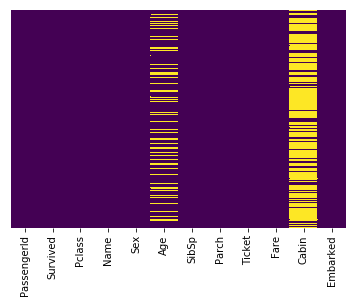

In [7]:
# can also be visuallised with heatmap
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')
plt.show()

In [8]:
## Drop Cabin since most of the data is invalid
titanic_data.drop('Cabin',axis = 1,inplace=True)

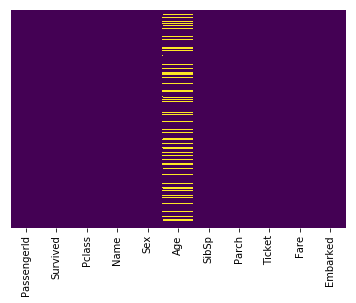

In [9]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')
plt.show()

#### Filling Details for the Age incorrect values
#### Can be done with adding the mean or with Some other way also. 

In [10]:
#titanic_data['Age'].fillna(titanic_data['Age'].mean())
#Will Add 29.699118 to all empty NAN values
#will Get back to this Later

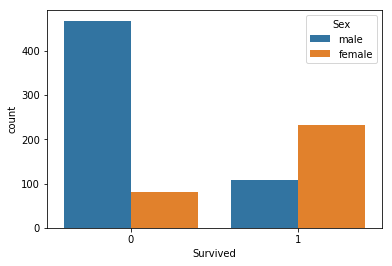

In [11]:
#Visualistation Survived with respect to Sex
sns.countplot('Survived',hue='Sex',data = titanic_data)
plt.show()

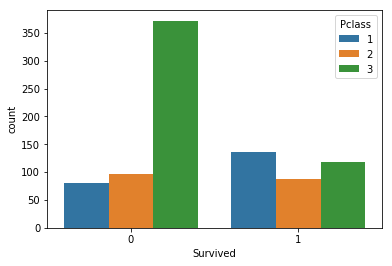

In [12]:
#Visualistation Survived with respect to Pclass
sns.countplot('Survived',hue='Pclass',data = titanic_data)
plt.show()

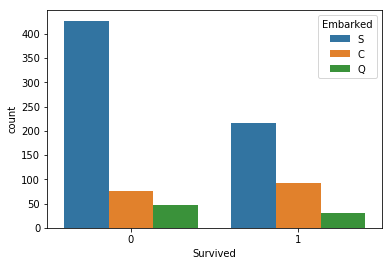

In [13]:
#Survived with Respec to Embarked Location
#Visualistation Survived with respect to Pclass
sns.countplot('Survived',hue='Embarked',data = titanic_data)
plt.show()

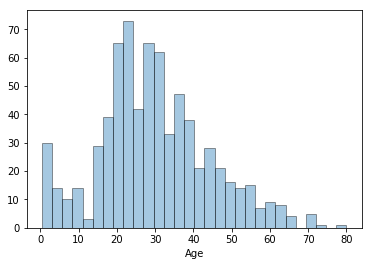

In [14]:
# Age Distribution of Passengers
sns.distplot(titanic_data['Age'].dropna(),bins = 30,kde=False,hist_kws={'edgecolor':'black'})
plt.show()

#### Back to Filling the NaN values of Age

Text(0.4,75,'Mean Age per pclass')

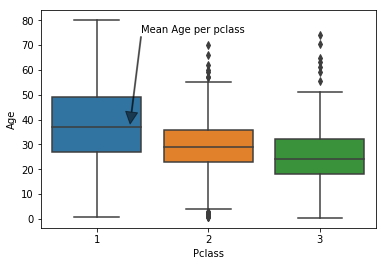

In [15]:
fig,ax = plt.subplots(1,1)
sns.boxplot('Pclass','Age',data=titanic_data)
ax.annotate('Mean Age per pclass', xy=(0.3, 38.233441), xytext=(0.4, 75),
            arrowprops=dict(facecolor='black',alpha = 0.5,width = 1),
            )

In [16]:
titanic_data.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

#### Using a function and Apply on Age

In [17]:
def ComputeAge(inputcols):
    age = inputcols[0]
    pclass = inputcols[1]
    if pd.isnull(age):
        return round(titanic_data.groupby(['Pclass'])['Age'].mean()[pclass],2)
    else:
        return age

In [18]:
titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(ComputeAge,axis =1)

In [19]:
#check for incorrect data/ null data
print(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [20]:
titanic_data.dropna(axis=0,inplace=True)

__Data has been Cleaned of incorrect/NaN values__

In [21]:
#Lets also Age bar plot. need to modify that first
Age =[-1,1,6,18,39,59,200]
binslabels =['Infant','Kids','Adolescents','Young Adults','Middle Aged','Senior Aged']
titanic_data['Ages categorized'] = pd.cut(titanic_data['Age'],Age,labels=binslabels)

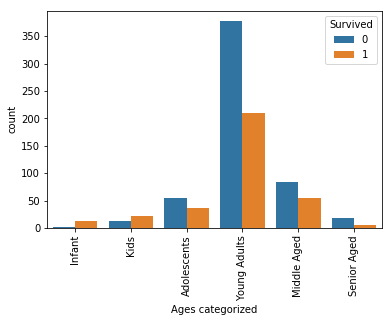

In [22]:
sns.countplot('Ages categorized',hue='Survived',data = titanic_data)
plt.xticks(rotation = 'vertical')
plt.show()

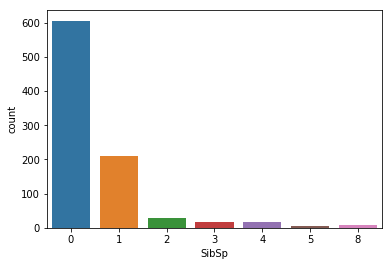

In [23]:
# Siblings
sns.countplot(data = titanic_data,x='SibSp')

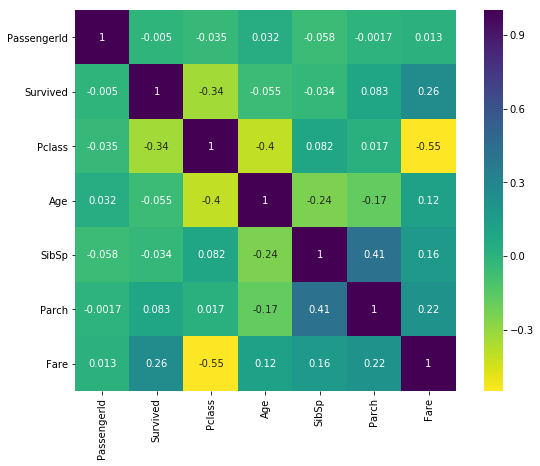

In [24]:
# Finally the heat map of the correlations of the data
plt.figure(figsize=(10,7))
sns.heatmap(titanic_data.corr(),cmap = 'viridis_r',square=True,annot=True)
plt.yticks(rotation = 'horizontal')
plt.xticks(rotation = 'vertical')
plt.show()

## VISUALISATION OF TITANIC DATA SET :)